<a href="https://colab.research.google.com/github/12Nepo/regresion_lineal/blob/main/DF_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("DFL.csv")
df

In [81]:
DFF = df[df["room_type"].isin(["Private room"])]

In [82]:
DFFN = DFF.dropna()


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

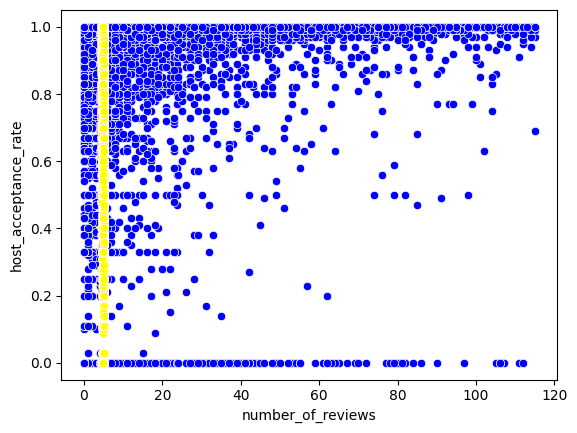

In [83]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=DFFN)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=DFFN)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=DFFN)

In [84]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= DFFN[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= DFFN['host_acceptance_rate']

In [85]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [86]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [87]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [88]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.0038051 , 0.06338939, 0.15069956]),
 'rank_': 3,
 'singular_': array([2062.05075845,   15.28565394,    7.94710706]),
 'intercept_': -0.3375766340143591}

**Modelo matemático: y= 0.0038051 , 0.06338939, 0.15069956 + -0.3375766340143591**

In [98]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.06483557471243306

In [99]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=DFFN[['number_of_reviews', 'review_scores_cleanliness', 'review_scores_communication']])
y_pred

array([0.95491052, 0.67893591, 0.69639795, ..., 0.74428341, 0.71653558,
       0.68371138])

In [108]:
#Insertamos la columna de predicciones en el DataFrame
DFFN.insert(3, 'Predicciones', y_pred)
DFFN

,Unnamed: 0,id,scrape_id,Predicciones,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,7.0,61792,20230329041210,0.954911,299558,2,3,19.41083,-99.18057,2,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",1089.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,16.0,760912,20230329041210,0.678936,3817743,1,1,19.40891,-99.16083,2,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",726.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,17.0,2088218,20230329041210,0.696398,10659485,1,2,19.34022,-99.15306,1,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",375.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,18.0,2093036,20230329041210,0.683711,3083561,1,2,19.44178,-99.20202,2,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",2835.0,t,2023-03-29,sin informacion,sin informacion,f
21,21.0,131610,20230329041210,0.683711,647454,3,4,19.35416,-99.16488,2,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,sin informacion,sin informacion,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21997,21996.0,803654903896411008.0,20230329041210,0.683711,484395611,5,7.0,19.409799,-99.183246,2.0,...,Private room in rental unit,Private room,1 shared bath,"[""Dedicated workspace"", ""Heating"", ""Wifi"", ""Pa...",2500.0,t,2023-03-29,sin informacion,sin informacion,t
22000,21999.0,802546134703129728.0,20230329041210,0.764580,49281983,1,1.0,19.337239,-99.184956,2.0,...,Private room in condo,Private room,1 shared bath,"[""Dedicated workspace"", ""Wifi"", ""Kitchen"", ""TV""]",350.0,t,2023-03-30,2023-01-17,2023-03-18,t
22006,22005.0,801695051238650368.0,20230329041210,0.744283,422054453,6,8.0,19.445146,-99.206319,2.0,...,Private room in home,Private room,1.5 baths,"[""Free street parking"", ""42\"" HDTV"", ""Hot wate...",595.0,t,2023-03-29,2023-01-27,2023-02-10,t
22007,22006.0,803701530756714240.0,20230329041210,0.716536,322510577,5,5.9,19.405628,-99.164799,2.0,...,Private room in rental unit,Private room,1 private bath,"[""Wifi"", ""Pets allowed"", ""Lockbox"", ""TV"", ""Fir...",283.0,t,2023-03-29,2023-01-22,2023-02-17,t


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

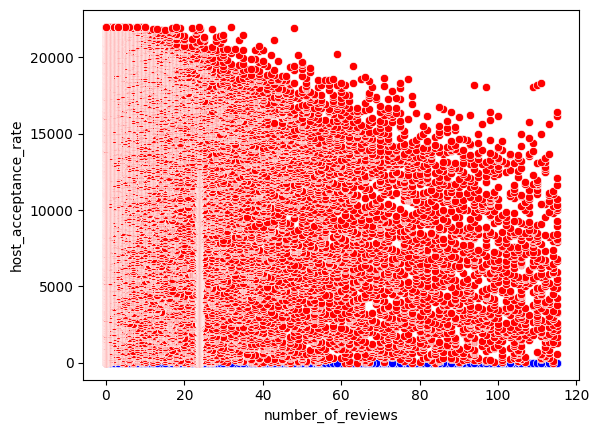

In [110]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='number_of_reviews', y='Unnamed: 0', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [111]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.06483557471243306

In [112]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2546283069739754

#**Hotel Room**

In [113]:
df= pd.read_csv("DFL.csv")
df

<ipython-input-113-c19714112582>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("DFL.csv")


,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,0.0,2056638,20230329041210,10531228,3,7,19.35353,-99.16299,3,1,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,f
1,1.0,2072354,20230329041210,16840050,3,3,19.35358,-99.16948,2,1,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",830.0,t,2023-03-30,2014-01-01,2022-11-04,f
2,2.0,696037,20230329041210,3531879,4,4,19.4418,-99.18402,6,3,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,f
3,3.0,35797,20230329041210,153786,1,1,19.38283,-99.2,2,1,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",3658.0,t,2023-03-29,sin informacion,sin informacion,f
4,4.0,44616,20230329041210,196253,16,16,19.41162,-99.17794,2.9,1,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,22006.0,803701530756714240.0,20230329041210,322510577,5,5.9,19.405628,-99.164799,2.0,1,...,Private room in rental unit,Private room,1 private bath,"[""Wifi"", ""Pets allowed"", ""Lockbox"", ""TV"", ""Fir...",283.0,t,2023-03-29,2023-01-22,2023-02-17,t
22008,22007.0,803741611995338496.0,20230329041210,195253877,6,6.0,19.411629,-99.161556,2.0,1,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Luggag...",804.0,t,2023-03-30,2023-01-19,2023-01-29,t
22009,22008.0,803758966788215680.0,20230329041210,492089560,3,3.0,19.405603,-99.155712,2.0,3,...,Private room in rental unit,Private room,1 shared bath,"[""Cleaning products"", ""Dedicated workspace"", ""...",454.0,t,2023-03-30,sin informacion,sin informacion,f
22010,22009.0,802784776175944704.0,20230329041210,27411678,18,20.0,19.425984,-99.167117,2.0,1,...,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Cleaning available during stay"", ""Lu...",1200.0,t,2023-03-30,2023-01-20,2023-03-20,t


In [114]:
DFF = df[df["room_type"].isin(["Hotel room"])]

In [115]:
DFFN = DFF.dropna()


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

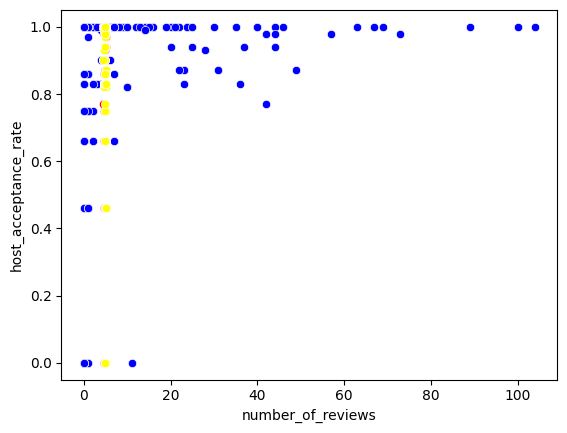

In [116]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=DFFN)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=DFFN)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=DFFN)

In [117]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= DFFN[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= DFFN['host_acceptance_rate']

In [118]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [119]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [120]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [121]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00276691,  0.01500972, -0.01078818]),
 'rank_': 3,
 'singular_': array([239.14981074,   2.14205401,   1.04790012]),
 'intercept_': 0.8145322685013078}

**Modelo matemático: y= 0.00276691,  0.01500972, -0.01078818 + 0.8145322685013078**

In [122]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.05717151640237195

In [123]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=DFFN[['number_of_reviews', 'review_scores_cleanliness', 'review_scores_communication']])
y_pred

array([0.89672731, 0.92051368, 0.9700179 , 0.89576157, 0.85500837,
       0.83948571, 0.90524432, 0.95760457, 0.84670763, 0.85308524,
       0.93918836, 0.8332947 , 0.84117381, 0.85906986, 0.84394072,
       0.8384069 , 0.9516439 , 1.12280314, 0.8980125 , 0.91248967,
       0.8332947 , 0.86472514, 0.89968199, 0.8384069 , 1.08131352,
       0.86363792, 0.87160984, 0.86361767, 0.87590486, 0.87435328,
       0.83948571, 0.87105634, 0.90009006, 0.90111729, 0.95610828,
       0.9559535 , 0.84478451, 0.8332947 , 0.8332947 , 0.86330911,
       0.86462243, 0.90188654, 0.90060134, 0.93339134, 0.84454947,
       0.83540495, 0.84954807, 0.84836707, 0.84645283, 0.84478451,
       0.84201759, 0.86312146, 0.8384069 , 0.84225263, 0.84394072,
       0.86999996, 0.90234621, 0.84394072, 0.8384069 , 0.85500837,
       0.90481279, 0.85351677, 1.0121955 , 0.93260854, 0.89793326,
       1.02115809, 1.00564951, 0.95893567, 0.84117381, 1.10614906,
       0.8332947 , 0.8384069 , 0.85163218, 0.8332947 , 0.87210

In [124]:
#Insertamos la columna de predicciones en el DataFrame
DFFN.insert(3, 'Predicciones', y_pred)
DFFN

,Unnamed: 0,id,scrape_id,Predicciones,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
14,14.0,737328,20230329041210,0.896727,3850198,19,21,19.43059,-99.17073,2,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",1006.0,t,2023-03-29,2013-01-05,2022-03-20,t
53,53.0,865012,20230329041210,0.920514,3850198,19,21,19.43078,-99.17011,2,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""TV with standard cable"", ""Hos...",1006.0,t,2023-03-29,2013-03-02,2022-01-01,t
55,55.0,868843,20230329041210,0.970018,3850198,19,21,19.43068,-99.17007,2,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2014-08-03,2023-03-22,t
62,62.0,869063,20230329041210,0.895762,3850198,19,21,19.43052,-99.17003,2,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2016-01-05,2023-01-13,t
66,66.0,281134,20230329041210,0.855008,196253,16,16,19.41108,-99.17634,3,...,Room in serviced apartment,Hotel room,1 private bath,"[""Free street parking"", ""TV with standard cabl...",3162.0,t,2023-03-30,2015-01-05,2019-10-05,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,9495.0,43205383.0,20230329041210,0.843941,336118145,5,6.0,19.43142,-99.15688,0.0,...,Room in hotel,Hotel room,sin informacion,"[""Smoke alarm"", ""Onsite bar"", ""Luggage dropoff...",0.0,t,2023-03-30,2021-02-21,2022-09-04,f
9538,9537.0,43247503.0,20230329041210,0.833295,318447028,1,3.0,19.42918,-99.19296,0.0,...,Room in hotel,Hotel room,sin informacion,"[""Hair dryer"", ""Smoke alarm"", ""Complimentary s...",0.0,t,2023-03-30,sin informacion,sin informacion,f
9540,9539.0,43247525.0,20230329041210,0.833295,318980910,3,3.0,19.35086,-99.18667,0.0,...,Room in hotel,Hotel room,sin informacion,"[""Smoke alarm"", ""Onsite bar"", ""Valet parking a...",0.0,t,2023-03-30,sin informacion,sin informacion,f
9545,9544.0,43247567.0,20230329041210,0.833295,319050749,4,4.0,19.43632,-99.1464,0.0,...,Room in bed and breakfast,Hotel room,sin informacion,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""On...",0.0,t,2023-03-30,sin informacion,sin informacion,f


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

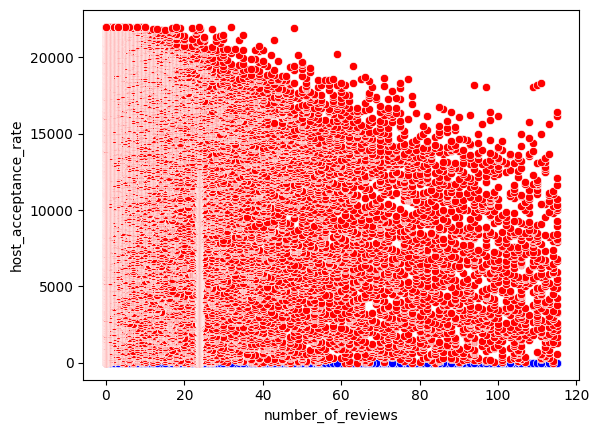

In [125]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='number_of_reviews', y='Unnamed: 0', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [126]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.05717151640237195

In [127]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2391056594946509